In [125]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np

import matplotlib.pyplot as plt
import seaborn as sns

import itertools

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve

In [127]:
Telco_df = pd.read_csv("Telco-Customer-Churn.csv", low_memory=False)

# Modeling

In [128]:
from sklearn.model_selection import train_test_split

y = Telco_df['Churn']
X = Telco_df.loc[:, Telco_df.columns != 'Churn']

X = X.drop(columns="Unnamed: 0")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

## Logistic Regression

In [129]:
?LogisticRegression

In [68]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
lr_gs = LogisticRegression()
parameters = {'C':[1,2,3,4,5], 'random_state': [3]} #include L1
lr_gs = GridSearchCV(lr_gs , parameters, cv=4, scoring='f1_weighted', n_jobs=1)
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5], 'random_state': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [70]:
print(lr_gs.best_params_, lr_gs.best_score_)

{'C': 2, 'random_state': 3} 0.798009879821929


In [71]:
from sklearn import metrics

print("Metrics on Training Data")
lrtrain_predict = lr_gs.predict(X_train)
print(metrics.accuracy_score(y_train, lrtrain_predict))
print(confusion_matrix(y_train, lrtrain_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
lrtest_pred = lr_gs.predict(X_test)
print(metrics.accuracy_score(y_test, lrtest_pred))
print(confusion_matrix(y_test,lrtest_pred))

Metrics on Training Data
0.8075464543041335
[[3479  401]
 [ 614  780]]
------------------------------
------------------------------
Metrics on Test Data
0.8071672354948806
[[1137  146]
 [ 193  282]]


In [133]:
y = Telco_df['Churn']
X = Telco_df.loc[:, Telco_df.columns != 'Churn']

X = X.drop(columns="Unnamed: 0")


scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=44)


lr_scaled = LogisticRegression(random_state = 44)
lr_scaled.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=44, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
lr_scaled_gs = LogisticRegression()
parameters = {'C':[58, 59, 60, 61, 62], 'random_state': [3], 'penalty': ['l1','l2']} #include L1
lr_scaled_gs2 = GridSearchCV(lr_scaled_gs , parameters, cv=3, scoring='f1_weighted', n_jobs=1)
lr_scaled_gs2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [58, 59, 60, 61, 62], 'random_state': [3], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [135]:
print(lr_scaled_gs2.best_params_, lr_scaled_gs2.best_score_)

{'C': 59, 'penalty': 'l2', 'random_state': 3} 0.797811260749914


In [136]:
from sklearn import metrics

print("Metrics on Training Data")
lrtrain_predict = lr_scaled_gs2.predict(X_train)
print(metrics.accuracy_score(y_train, lrtrain_predict))
print(confusion_matrix(y_train, lrtrain_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
lrtest_pred = lr_scaled_gs2.predict(X_test)
print(metrics.accuracy_score(y_test, lrtest_pred))
print(confusion_matrix(y_test,lrtest_pred))

Metrics on Training Data
0.8075464543041335
[[3485  395]
 [ 620  774]]
------------------------------
------------------------------
Metrics on Test Data
0.8031854379977247
[[1139  144]
 [ 202  273]]


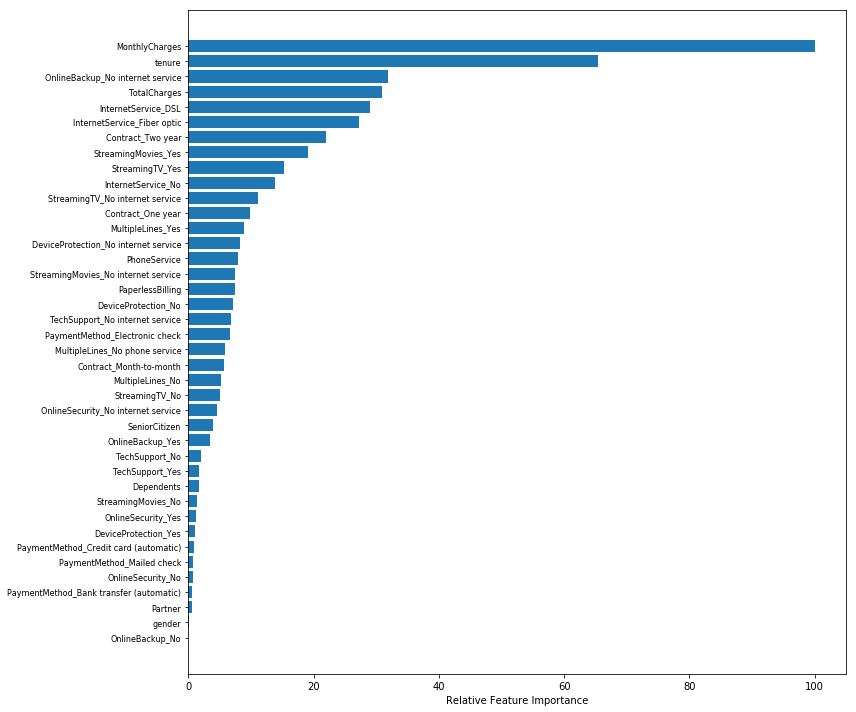

In [137]:
clf = LogisticRegression(C= 60, penalty= 'l1')
clf.fit(X_train, y_train)


feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(12,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()


## KNN

In [10]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

In [11]:
n_neighbors = range(1,15)
knn_accuracy = list()
knn_recall = list()

for n in n_neighbors:
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_prediction))
    knn_recall.append(recall_score(y_test, knn_prediction))

Text(0.5,1,'KNN Model - Accuracy, Recall vs Neighbors')

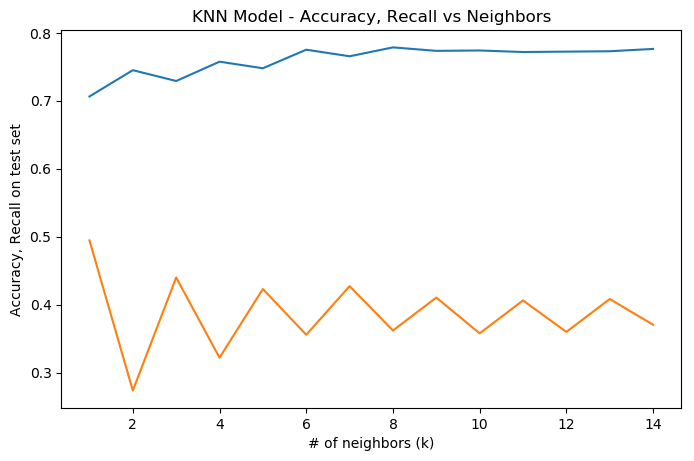

In [12]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(n_neighbors, knn_accuracy)
plt.plot(n_neighbors, knn_recall)
plt.xlabel('# of neighbors (k)')
plt.ylabel('Accuracy, Recall on test set')
plt.title('KNN Model - Accuracy, Recall vs Neighbors')

In [13]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)


print("Metrics on Training Data")
train_predict = knn.predict(X_train)
print(metrics.accuracy_score(y_train, train_predict))
print(confusion_matrix(y_train, train_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Metrics on Training Data
0.8206295032233599
[[3569  311]
 [ 635  759]]
------------------------------
------------------------------
Metrics on Test Data
0.7656427758816837
[[1143  140]
 [ 272  203]]


# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.6973833902161547
0.6860068259385665


In [15]:
print(classification_report(y_train, nb.predict(X_train)))
print(confusion_matrix(y_train, nb.predict(X_train)))


             precision    recall  f1-score   support

          0       0.92      0.64      0.76      3880
          1       0.46      0.85      0.60      1394

avg / total       0.80      0.70      0.72      5274

[[2499 1381]
 [ 215 1179]]


In [16]:
print(classification_report(y_test, nb.predict(X_test)))
print(confusion_matrix(y_test, nb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.91      0.63      0.75      1283
          1       0.46      0.84      0.59       475

avg / total       0.79      0.69      0.70      1758

[[807 476]
 [ 76 399]]


## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier

In [23]:
?DecisionTreeClassifier()

In [18]:
dt_gs = DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],'max_depth': [1,3,5,6,7,8,9,10], 'max_features': ['auto', 'sqrt'], 'random_state': [3]}
dt_gs = GridSearchCV(dt_gs , parameters, cv=4, scoring='f1_weighted', n_jobs=1)
dt_gs.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt'], 'random_state': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [19]:
print(dt_gs.best_params_, dt_gs.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'random_state': 3} 0.7775881627901319


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(max_depth= 6, criterion = 'entropy' ) #
dt.fit(X_train, y_train)
       
dt_predictions = dt.predict(X_test)

#print(rf.score(X_test, y_test))
scores = cross_val_score(dt, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(metrics.classification_report(y_test, dt_predictions))
print(metrics.confusion_matrix(y_test, dt_predictions))

[0.77556818 0.75284091 0.73295455 0.74358974 0.78632479]
Accuracy: 0.76 (+/- 0.04)

             precision    recall  f1-score   support

          0       0.82      0.88      0.85      1283
          1       0.60      0.49      0.54       475

avg / total       0.76      0.77      0.77      1758

[[1127  156]
 [ 242  233]]


In [142]:
dt_importances = dt.feature_importances_
dt_weights = pd.Series(dt_importances,
                 index=X.columns.values)
dt_weights.sort_values()[-10:].plot(kind = 'barh',color = 'purple')


ValueError: Length of passed values is 41, index implies 40

## Random Forest

In [130]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt

from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV

In [29]:
rfgrid = RandomForestClassifier()
parameters = {'criterion':['gini','entropy'], 'n_estimators': [400, 600, 800, 950, 970, 1100, 1000],'random_state': [2]}
gridrf = GridSearchCV(rfgrid , parameters, cv=3, scoring='f1_weighted', n_jobs=1)
gridrf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [400, 600, 800, 950, 970, 1100, 1000], 'random_state': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [30]:
print(gridrf.best_params_, gridrf.best_score_)

{'criterion': 'entropy', 'n_estimators': 950, 'random_state': 2} 0.7791444729892728


In [131]:
rf = RandomForestClassifier(n_estimators = 950, criterion = 'entropy') 
rf.fit(X_train, y_train)
       
rf_predictions = rf.predict(X_test)

#print(rf.score(X_test, y_test))
scores = cross_val_score(rf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(mt.classification_report(y_test, rf_predictions))
print(mt.confusion_matrix(y_test, rf_predictions))



[0.78977273 0.80965909 0.76704545 0.78917379 0.79202279]
Accuracy: 0.79 (+/- 0.03)

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1283
          1       0.63      0.50      0.56       475

avg / total       0.78      0.79      0.78      1758

[[1146  137]
 [ 238  237]]


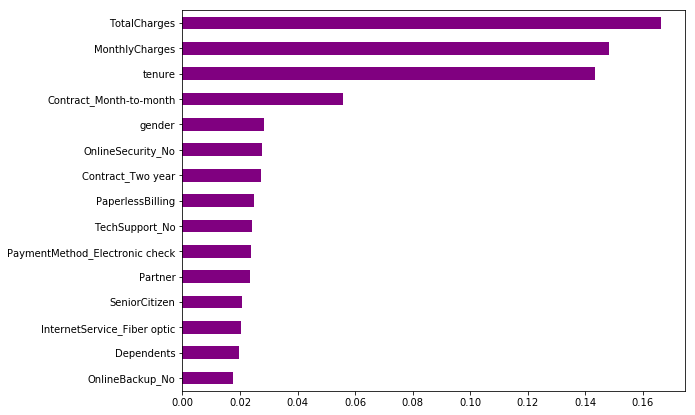

In [150]:
importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh', color = 'purple',figsize=(9,7))

## XGBOOSTED 

## Multi-layer Perceptron (Neural Networks)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(12))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [40]:
predictions = mlp.predict(X_train)
print(confusion_matrix(y_train, predictions))

[[3521  359]
 [ 616  778]]


In [32]:
mlp_gs = MLPClassifier()
parameters = {'hidden_layer_sizes':[10,11,12,13]}
gridmlp = GridSearchCV(mlp_gs , parameters, cv=3, scoring='f1_weighted', n_jobs=1)
gridmlp.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [33]:
print(gridmlp.best_params_, gridmlp.best_score_)

{'hidden_layer_sizes': 12} 0.7937779680693937


In [34]:
predictions = gridmlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1144  139]
 [ 210  265]]


In [35]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1283
          1       0.66      0.56      0.60       475

avg / total       0.79      0.80      0.80      1758



## SVM

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

param_grid = {'C': [0.1, 1, 2, 3], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1] }
grid = GridSearchCV(svc, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 2, 3], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
print(grid.best_params_, grid.best_score_)

{'C': 1, 'gamma': 0.0001} 0.7836556693211983


In [45]:
from sklearn.svm import SVC  

y_pred = grid.predict(X_test)  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1179  104]
 [ 286  189]]
             precision    recall  f1-score   support

          0       0.80      0.92      0.86      1283
          1       0.65      0.40      0.49       475

avg / total       0.76      0.78      0.76      1758



In [99]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()

param_grid_lin = {'C': [48,49,50,51,52]}
grid_lin = GridSearchCV(svc_lin, param_grid=param_grid_lin, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_lin.fit(X_train,y_train)

print(grid_lin.best_params_, grid_lin.best_score_)

{'C': 50} 0.6637170256611765


In [100]:
from sklearn.svm import SVC  

y_pred = grid_lin.predict(X_test)  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[988 295]
 [127 348]]
             precision    recall  f1-score   support

          0       0.89      0.77      0.82      1283
          1       0.54      0.73      0.62       475

avg / total       0.79      0.76      0.77      1758



In [57]:
from sklearn.svm import SVC

svm_lin = SVC(kernel='linear') 
svm_lin.fit(X_train,y_train)
preds = svm_lin.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.785551763367463

In [58]:
print(confusion_matrix(y_test, preds))  
print(classification_report(y_test, preds)) 

[[1181  102]
 [ 275  200]]
             precision    recall  f1-score   support

          0       0.81      0.92      0.86      1283
          1       0.66      0.42      0.51       475

avg / total       0.77      0.79      0.77      1758



In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(lr,X_train,X_test,y_train,y_test,
                      "Logistic Regression(Baseline_model)")

model2 = model_report(clf,X_train,X_test,y_train,y_test,
                      'Logistic Regression Classifier Standardized')

model3 = model_report(dt,X_train,X_test,y_train,y_test,
                      "Decision Tree")

model4 = model_report(knn,X_train,X_test,y_train,y_test, 
                      "KNN Classifier")

model5 = model_report(rf,X_train,X_test,y_train,y_test,
                      "Random Forest Classifier")

model6 = model_report(nb,X_train,X_test,y_train,y_test,
                      "Naive Bayes")

model7 = model_report(mlp,X_train,X_test,y_train,y_test,
                      "Neural Networks")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

In [119]:
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression(Baseline_model),0.804892,0.583158,0.656398,0.617614,0.735071,0.487261
1,Logistic Regression Classifier Standardized,0.802048,0.572632,0.652278,0.609865,0.729808,0.477994
2,Decision Tree,0.773606,0.494737,0.597964,0.541475,0.685794,0.392948
3,KNN Classifier,0.755973,0.547368,0.548523,0.547945,0.690286,0.380824
4,Random Forest Classifier,0.796928,0.524211,0.655263,0.582456,0.711053,0.450476
5,Naive Bayes,0.686007,0.837895,0.455899,0.590504,0.733834,0.370037
6,Neural Networks,0.804323,0.574737,0.657831,0.613483,0.732029,0.483281


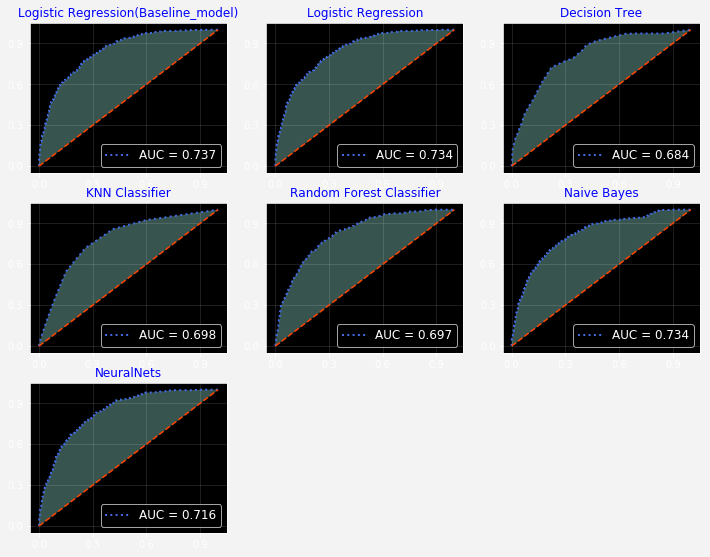

In [47]:
lst    = [lr,lr_gs,dt,knn,rf,nb,mlp]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'NeuralNets']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(5,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

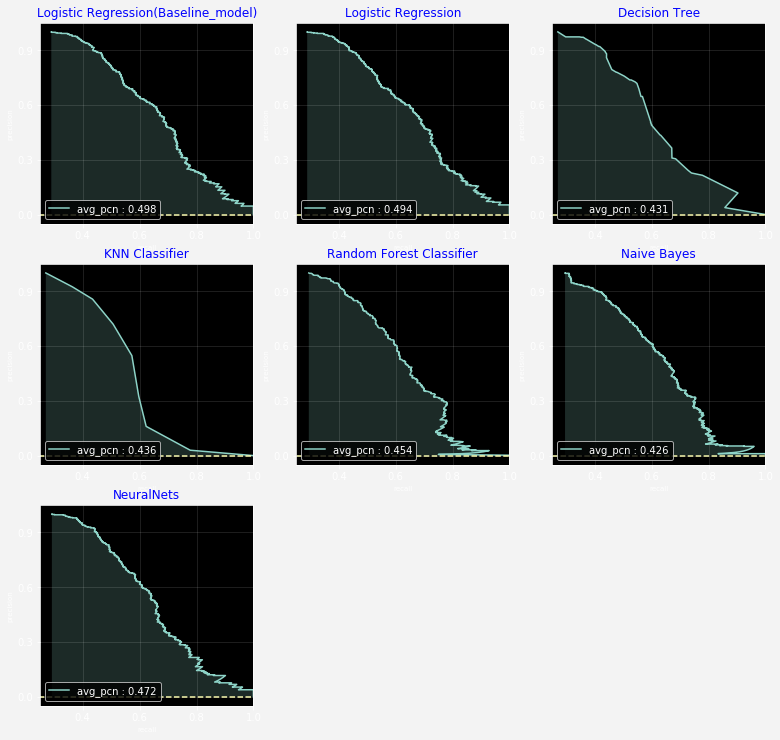

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [lr,clf,dt,knn,rf,nb,mlp]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression Classifier Standardized',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'NeuralNets']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))

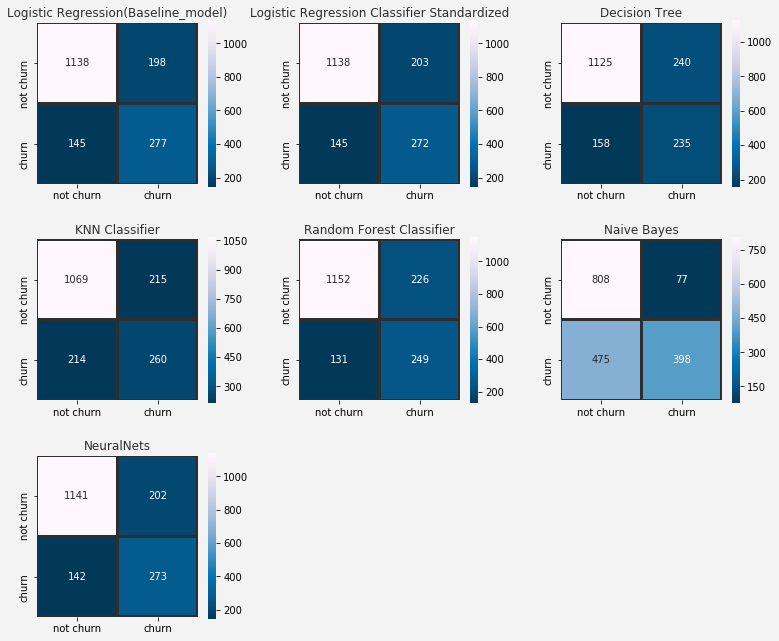

In [120]:
lst    = [lr,clf,dt,knn,rf,nb,mlp]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression Classifier Standardized',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'NeuralNets']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "#2e2e2e",cmap = "PuBu_r")
    plt.title(k,color = "#2e2e2e")
    plt.subplots_adjust(wspace = .3,hspace = .3)

In [121]:
import itertools
import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges): #plt.cm.Oranges
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = (100*cm.astype('float')) / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        thresh = cm.max() / 2.
    return (cm)


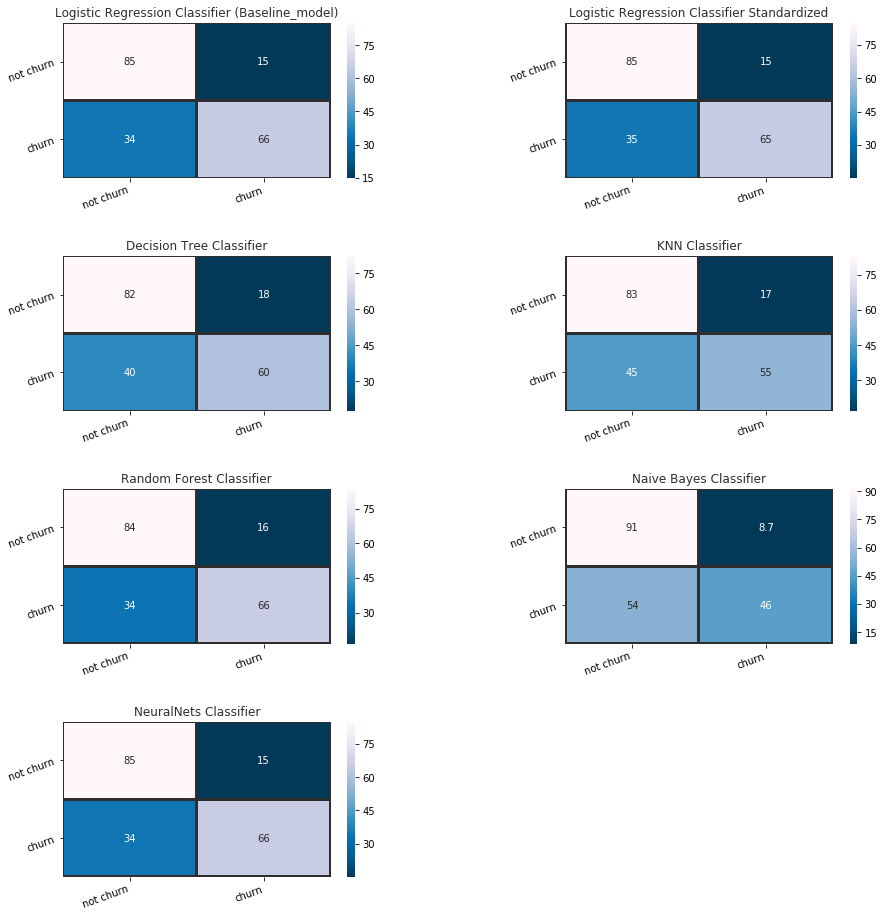

In [123]:
lst    = [lr,clf,dt,knn,rf,nb,mlp]

length = len(lst)

mods   = ['Logistic Regression Classifier (Baseline_model)', 'Logistic Regression Classifier Standardized',
          'Decision Tree Classifier','KNN Classifier','Random Forest Classifier',"Naive Bayes Classifier",
          'NeuralNets Classifier']

fig = plt.figure(figsize=(15,20))

for i,j,k in itertools.zip_longest(lst,range(length), mods) :
    plt.subplot(5,2,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions, y_test)
    dec_matrix = plot_confusion_matrix(conf_matrix, classes=['', ''], normalize=True, title='Confusion Matrix')
    sns.heatmap(dec_matrix, annot=True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2, linecolor = "#2e2e2e",cmap = "PuBu_r")
    plt.subplots_adjust(wspace = .5,hspace = .5)
    plt.xticks(rotation=20, ha="right")
    plt.yticks(rotation=20, ha="right")
    plt.title(k,color = "#2e2e2e")
    